# Linear Support Vector Classification.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

## Dataset

In [23]:
dataset_url = "https://raw.githubusercontent.com/kalyaniuniversity/mgx-datasets/master/DLBCL/datasets/dlbcl-fl.csv"

df = pd.read_csv(dataset_url)

In [24]:
df.shape

(77, 7071)

In [25]:
df.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
0,-1,-45,176,97,-57,233,265,945,56,819,...,1036,-161,1523,-72,897,366,3,76,-28,DLBCL
1,25,-17,531,353,122,155,209,1688,42,639,...,4254,-75,6056,-68,737,81,-4,41,-45,DLBCL
2,73,91,257,80,614,507,760,2252,196,863,...,1934,-129,2901,-9,946,450,38,164,-62,DLBCL
3,267,41,202,138,198,355,245,1469,170,384,...,2469,93,2465,-119,339,321,-63,73,-13,DLBCL
4,16,24,187,39,145,254,571,930,-11,439,...,608,-39,1667,-87,721,213,15,155,-26,DLBCL


In [26]:
col = df.columns
col

Index(['A28102', 'AB000114_at', 'AB000115_at', 'AB000220_at', 'AB000409_at',
       'AB000449_at', 'AB000450_at', 'AB000460_at', 'AB000462_at',
       'AB000464_at',
       ...
       'U58516_at', 'U73738_at', 'X06956_at', 'X16699_at', 'X83863_at',
       'Z17240_at', 'L49218_f_at', 'M71243_f_at', 'Z78285_f_at', 'class'],
      dtype='object', length=7071)

In [27]:
df['class'].value_counts()

DLBCL    58
FL       19
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


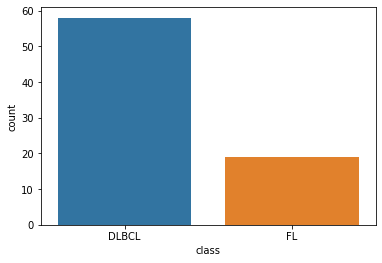

In [28]:
sns.countplot(df['class'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Columns: 7071 entries, A28102 to class
dtypes: int64(7070), object(1)
memory usage: 4.2+ MB


In [30]:
X = df.drop(['class'], axis=1)

y = df['class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
X_train.shape, X_test.shape

((61, 7070), (16, 7070))

In [33]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [35]:
X_train = pd.DataFrame(X_train, columns=[col[:-1]])

X_test = pd.DataFrame(X_test, columns=[col[:-1]])

In [40]:
X_train.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.329929,0.110684,-0.851840,-0.929113,0.019694,0.471262,-0.092767,-1.167389,0.039600,-1.027182,...,-0.763407,-0.914492,0.516587,-0.115737,0.574826,-0.610635,-0.625854,0.593170,-0.022156,0.545648
1,-0.639741,-0.144686,-0.676179,-0.077532,0.657665,0.302067,-0.023135,-0.504128,-0.112431,-0.980107,...,0.809254,-0.591352,-0.763420,0.035327,-1.184599,-1.064350,-1.591035,-0.675258,-1.467619,-1.923352
2,0.040631,0.079542,-1.136244,2.005674,-0.036269,1.691881,0.106846,-0.242739,-0.526292,-0.525054,...,-0.104903,-0.260819,0.497434,-0.584343,0.720837,-0.272432,0.255398,0.637366,-0.319598,0.639623
3,-0.020116,1.219366,1.753801,1.766387,-1.868105,-0.439167,-0.018493,1.049238,0.630830,1.514840,...,1.413528,1.859661,0.146310,-0.379988,-0.330438,0.912468,3.213886,-0.723874,0.838860,0.396141
4,3.266325,-1.832623,2.736668,2.653157,0.672589,-0.189403,0.733539,1.578925,2.750814,3.389973,...,0.600083,0.045426,-2.921236,-0.804113,-2.735960,0.386110,-1.821839,-3.092785,-1.498929,-2.504293


In [52]:
svc_model = SVC(kernel='linear', C=1.0)

svc_model.fit(X_train, y_train)

y_predicted = svc_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [53]:
accuracy_score(y_test, y_predicted) * 100

100.0

In [54]:
print(f'Training set score: {svc_model.score(X_train, y_train):.4f}')

print(f'Test set score: {svc_model.score(X_test, y_test):.4f}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Training set score: 1.0000
Test set score: 1.0000
